# 1. Data cleaning & getting rid of irrelevant information before clustering

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('house_rental_data.csv.txt',index_col = 'Unnamed: 0')
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000
647,1707.840,3,14,3,2,2,65000


In [3]:
df.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [4]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True, drop = True)
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
574,2846.400,5,12,4,2,2,138888
575,1359.156,7,15,3,2,2,45000
576,377.148,4,10,1,1,1,24800
577,740.064,13,14,1,1,1,45000


In [5]:
new_df = df[['Sqft','Bedroom','Bathroom','Price']]
new_df

,Sqft,Bedroom,Bathroom,Price
0,1177.698,2,2,62000
1,2134.800,4,2,78000
2,1138.560,2,1,58000
3,1458.780,3,2,45000
4,967.776,3,2,45000
...,...,...,...,...
574,2846.400,4,2,138888
575,1359.156,3,2,45000
576,377.148,1,1,24800
577,740.064,1,1,45000


# 2. Finding the optimal value of k

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
sse = []
k_rng= range(1,10)
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(new_df)
    sse.append(km.inertia_)

C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Sum of squared distance')

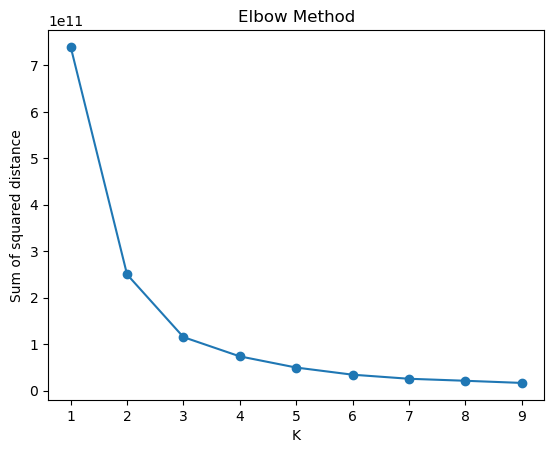

In [8]:
plt.plot(k_rng,sse,'o-')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Sum of squared distance')

In [9]:
# K = 3
from sklearn.cluster import KMeans
k = 3
km = KMeans(n_clusters=k, random_state=0)
km.fit(new_df)

C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [10]:
prediction = km.fit_predict(new_df)

C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


# 3. Storing cluster to which the house belongs along with the data

In [12]:
new_df['Cluster'] = prediction
new_df

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_24920\1422648862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = prediction


,Sqft,Bedroom,Bathroom,Price,Cluster
0,1177.698,2,2,62000,0
1,2134.800,4,2,78000,2
2,1138.560,2,1,58000,0
3,1458.780,3,2,45000,0
4,967.776,3,2,45000,0
...,...,...,...,...,...
574,2846.400,4,2,138888,1
575,1359.156,3,2,45000,0
576,377.148,1,1,24800,0
577,740.064,1,1,45000,0
